Jupyter notebook file to test model, without having to rerun everything

Import libraries

In [59]:
from skimage.viewer import ImageViewer
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import feature
from skimage.filters import gaussian

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import random

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
from keras.utils import to_categorical

Preprocessing filters

In [60]:
image = imread("C:/Users/emmar/Documents/GitHub/VISN/Opdracht_1/flower.jpg")

#grayscale
image_gray = rgb2gray(image)

#edge detection
canny_filter = feature.canny(image_gray, sigma=2) 

#gaussian filter                    #for rgb image
gaussian_filter = gaussian(image, multichannel=True, sigma=2) 

# viewer = ImageViewer(image)
# viewer.show()

# viewer = ImageViewer(image_gray)
# viewer.show()

# viewer = ImageViewer(canny_filter)
# viewer.show()

# viewer = ImageViewer(gaussian_filter)
# viewer.show()

C:\Users\emmar\AppData\Local\Temp\ipykernel_18960\2925268095.py:10: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_filter = gaussian(image, multichannel=True, sigma=2)


Loading in the dataset
Dataset used for this project from: https://www.kaggle.com/datasets/grassknoted/asl-alphabet?resource=download
Tutorial: https://www.youtube.com/watch?v=j-3vuBynnOE

In [61]:
dataset_dir = "C:/Users/emmar/Documents/GitHub/VISN/Eindopdracht/dataset/asl_alphabet_train/asl_alphabet_train"
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

training_data = []

for letter in letters:
    #get directory of a certain letter
    path = os.path.join(dataset_dir, letter)

    #create number for each letter
    letter_num = letters.index(letter)
    print(letter)
    
    for image in os.listdir(path):
        #get one image
        image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)

        #compress the image to a smaller resolution
        image_size = 50
        compressed_image_array = cv2.resize(image_array, (image_size, image_size))

        #add canny filter
        # canny_filter_image = feature.canny(compressed_image_array, sigma=3)

        #add gaussian filter
        # gaussian_filter_image = gaussian(compressed_image_array, sigma=2)

        #add new image to the training set
        training_data.append([compressed_image_array, letter_num])

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
nothing
space


Formating the train and test data

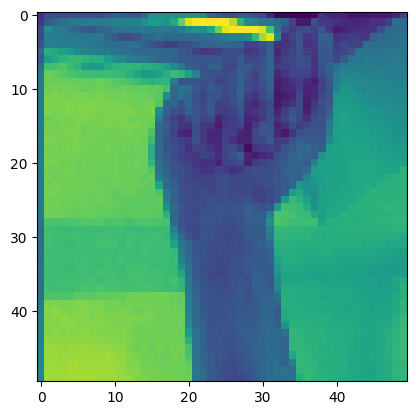

In [62]:
#randomize the images
random.shuffle(training_data)

plt.imshow(training_data[0][0])

train_images = []
train_labels = []

test_data_size = 10000

test_images = []
test_labels = []

#separate images and labels into the testing dataset
#(the first 10.000) and the training dataset (the rest)

#TODO can this be done easier? split?
for i in range(len(training_data)):
    if i < test_data_size:
        test_images.append(training_data[i][0])
        test_labels.append(training_data[i][1])
    else:
        train_images.append(training_data[i][0])
        train_labels.append(training_data[i][1])

#reshape train and test images
train_images = np.array(train_images).reshape(-1, image_size, image_size, 1)
test_images = np.array(test_images).reshape(-1, image_size, image_size, 1)

#normalize the images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

#normalize the images canny
# train_images = train_images - 0.5
# test_images = test_images - 0.5

Training and testing the CNN

In [63]:
num_filters = 20
filter_size = 3
pool_size = 2
num_epochs = 5

model = Sequential([
    Conv2D(num_filters, filter_size, activation='relu', input_shape=train_images[0].shape),
    MaxPooling2D(pool_size=pool_size),

    Conv2D(num_filters, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),

    Conv2D(num_filters, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),

    Flatten(),
    Dense(29, activation="sigmoid", name="dense")
])

model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, to_categorical(train_labels), epochs=num_epochs, validation_data=(test_images, to_categorical(test_labels)))

test_loss, test_acc = model.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print(test_acc)

Epoch 1/5
2407/2407 [==============================] - 79s 33ms/step - loss: 1.4351 - accuracy: 0.5704 - val_loss: 0.6932 - val_accuracy: 0.7771
Epoch 2/5
2407/2407 [==============================] - 83s 34ms/step - loss: 0.5041 - accuracy: 0.8385 - val_loss: 0.3740 - val_accuracy: 0.8775
Epoch 3/5
2407/2407 [==============================] - 79s 33ms/step - loss: 0.2992 - accuracy: 0.9006 - val_loss: 0.2548 - val_accuracy: 0.9130
Epoch 4/5
2407/2407 [==============================] - 87s 36ms/step - loss: 0.2083 - accuracy: 0.9306 - val_loss: 0.2186 - val_accuracy: 0.9251
Epoch 5/5
2407/2407 [==============================] - 93s 39ms/step - loss: 0.1567 - accuracy: 0.9478 - val_loss: 0.1382 - val_accuracy: 0.9564
313/313 - 5s - loss: 0.1382 - accuracy: 0.9564 - 5s/epoch - 15ms/step
0.9563999772071838


Testing the model

A
1/1 [==============================] - 0s 35ms/step
[[9.99999881e-01 4.24361677e-14 7.43188317e-15 5.78609013e-19
  9.83565688e-01 8.95400282e-11 2.71156236e-10 0.00000000e+00
  9.21949947e-08 8.26140456e-16 3.62400040e-15 3.98858305e-07
  1.16542120e-04 1.15653824e-08 5.64350966e-09 2.52976081e-20
  6.85620827e-17 4.26852156e-22 8.92174661e-01 5.07995896e-02
  2.02811393e-10 1.06477644e-08 8.69992121e-13 9.44509625e-01
  7.84410759e-08 2.14260866e-11 7.75090768e-04 1.57234642e-28
  1.15049047e-11]]
B
1/1 [==============================] - 0s 36ms/step
[[1.7311935e-03 1.0000000e+00 2.4597288e-15 1.4572851e-08 1.0000000e+00
  3.7605938e-12 4.2315365e-09 1.7301333e-38 9.7493094e-06 0.0000000e+00
  9.2974854e-01 2.3150558e-11 9.9952465e-01 9.1053909e-01 9.3983710e-10
  2.3041039e-34 8.1451364e-35 2.5503199e-05 4.4270845e-08 9.3277404e-03
  1.0426605e-01 1.5159171e-06 1.2309914e-17 1.8247518e-01 1.5271448e-32
  3.8937322e-21 1.2660719e-05 0.0000000e+00 4.6221225e-21]]
C
1/1 [============

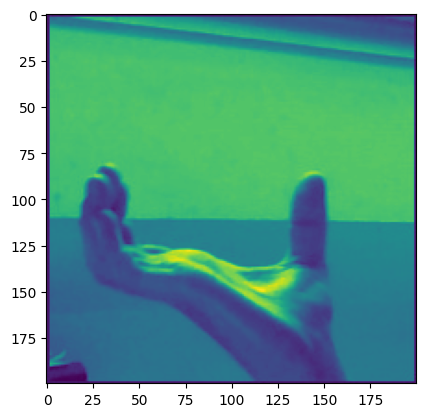

In [71]:
predict_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']

for letter in predict_letters:
    print(letter)
    path = "C:/Users/emmar/Documents/GitHub/VISN/Eindopdracht/dataset/asl_alphabet_test/asl_alphabet_test/"+letter+"_test.jpg"
    image_to_predict = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    compressed_image_to_predict = cv2.resize(image_to_predict, (image_size, image_size))
    reshaped_image_to_predict = compressed_image_to_predict.reshape(-1, image_size, image_size, 1)
    normalized_image_to_predict = (reshaped_image_to_predict / 255) - 0.5

    prediction = model.predict(normalized_image_to_predict)
    print(prediction)